In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
new_model = tf.keras.models.load_model('digit_classify.model')

In [3]:
test = pd.read_csv("test.csv")

In [4]:
len(test)

28000

In [5]:
test.shape

(28000, 784)

In [6]:
test=test.values.reshape(-1,28,28)

In [7]:
test.shape

(28000, 28, 28)

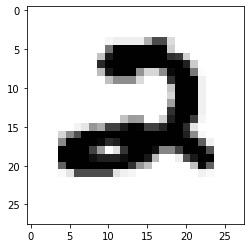

In [8]:
plt.imshow(test[0], plt.cm.binary)
plt.show()

In [9]:
test = test.reshape(test.shape[0], 28, 28, 1)
test = tf.keras.utils.normalize(test, axis=1)
test.shape

(28000, 28, 28, 1)

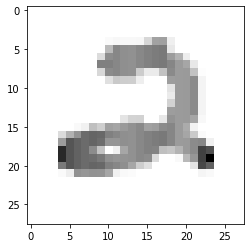

In [10]:
plt.imshow(test[0], plt.cm.binary)
plt.show()

In [11]:
predictions = new_model.predict(test)

In [12]:
output = pd.read_csv("Kaggle_Submit.csv")

In [13]:
output

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [14]:
output['Label']

0        2
1        0
2        9
3        9
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

In [15]:
output['Label'][0]

2

In [16]:
import numpy as np
for i in range(len(test)):
    output['Label'][i] = np.argmax(predictions[i])

In [17]:
output

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [18]:
output.to_csv('Kaggle_Submit.csv', index=False)